In [1]:
import torch
from PIL import Image
import numpy as np

from torchvision import datasets, transforms

from lucent.optvis import render, transform
from lucent.modelzoo import inceptionv1_avgPool
from lucent.misc.io import show
from lucent.util import set_seed

from helper import load_pad, text_synth_param_occluder, activation_difference, gram_matrix


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = inceptionv1_avgPool(pretrained=True)
_ = model.to(device).eval()

/home/stijn/.local/lib/python3.6/site-packages/torch/cuda/__init__.py:120: UserWarning: 
    Found GPU%d %s which is of cuda capability %d.%d.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is %d.%d.
    
  warnings.warn(old_gpu_warn.format(d, name, major, minor, min_arch // 10, min_arch % 10))


In [3]:
layers = ['conv2d2']
seed = 0
pic_size = 800
final_size = (600,300)
stim_path = '/media/stijn/2bb74e85-3681-4561-88b7-abd98482de61/paolo/Data/'

In [4]:
all_transforms = [
    transform.jitter(16),
    transform.random_scale([n/1000. for n in range(925, 1150)]),
    transform.random_rotate(list(range(-50,50))),
    transform.jitter(8)
]

In [5]:
mask_test = load_pad(stim_path + 'crocodile_IN.bmp',pic_size,0)
pic_test = load_pad(stim_path + 'crocodile_IN_orig.png',pic_size,0)
mask = mask_test!=0
occluder = np.repeat(mask[:,:,np.newaxis],3,2)
pic = pic_test

100%|██████████| 32/32 [00:06<00:00,  4.59it/s]



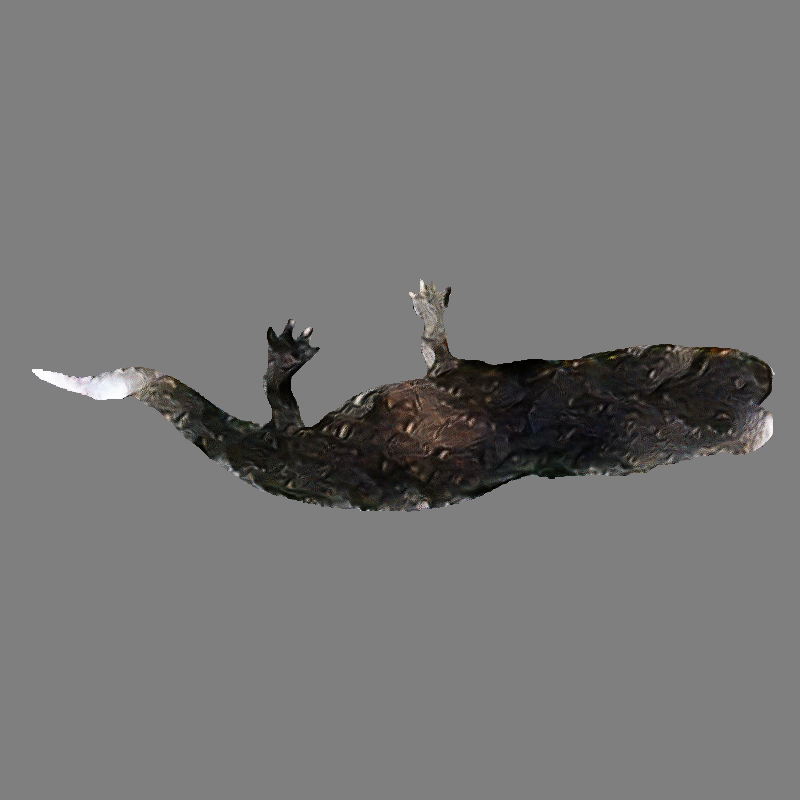
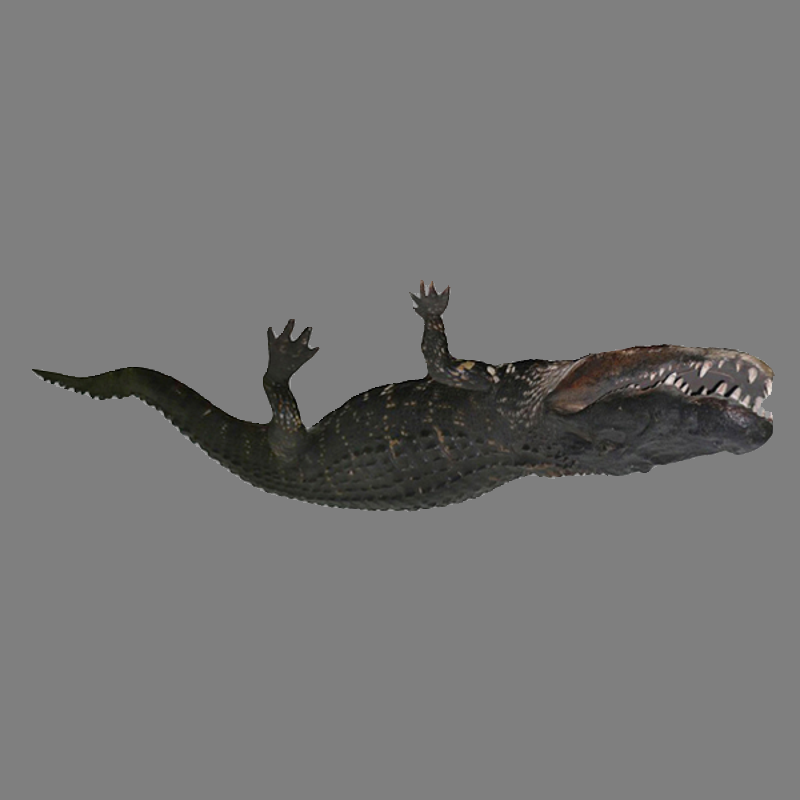

In [6]:
param_f = lambda: text_synth_param_occluder(pic, occluder, device)
for lay in layers:
    set_seed(seed)
    objective = activation_difference([lay], transform_f=gram_matrix)
    vis = render.render_vis(model, objective, param_f, show_inline=True, transforms=all_transforms, thresholds=(32,))

In [7]:
filename = stim_path + "crocodile_IN_text" + '.png'
temp = vis[0][0]
temp = temp[200:600,:,:]
temp_pic = Image.fromarray(np.uint8((temp)*255))
temp_pic = temp_pic.resize(final_size,Image.BILINEAR)
temp_pic.save(filename)

In [8]:
mask_test = load_pad(stim_path + 'monkey_2_IN.bmp',pic_size,0)
pic_test = load_pad(stim_path + 'monkey_2_IN_orig.png',pic_size,0)
mask = mask_test!=0
occluder = np.repeat(mask[:,:,np.newaxis],3,2)
pic = pic_test

100%|██████████| 32/32 [00:07<00:00,  4.55it/s]



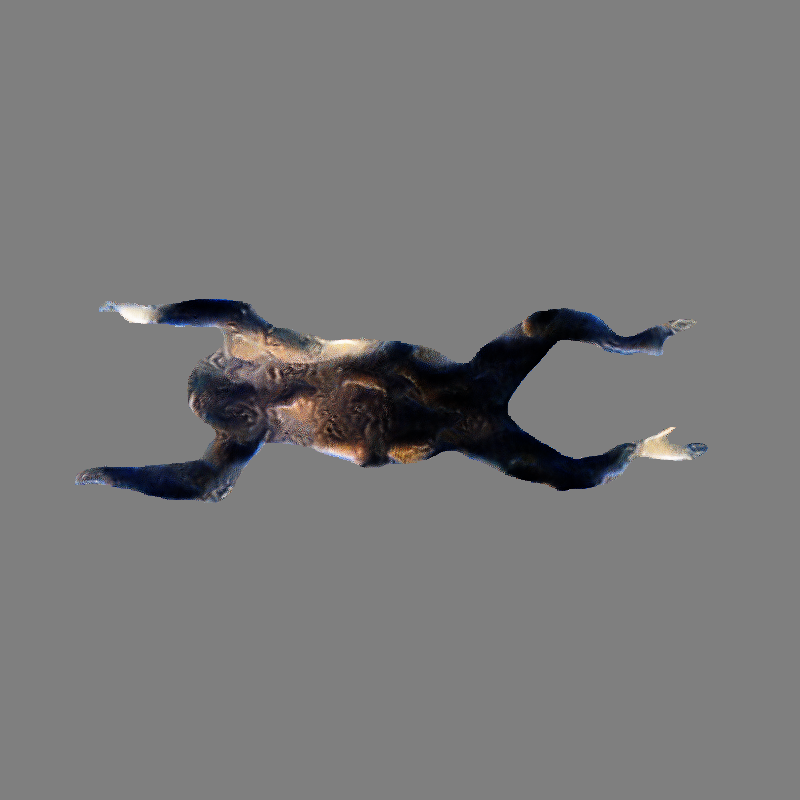
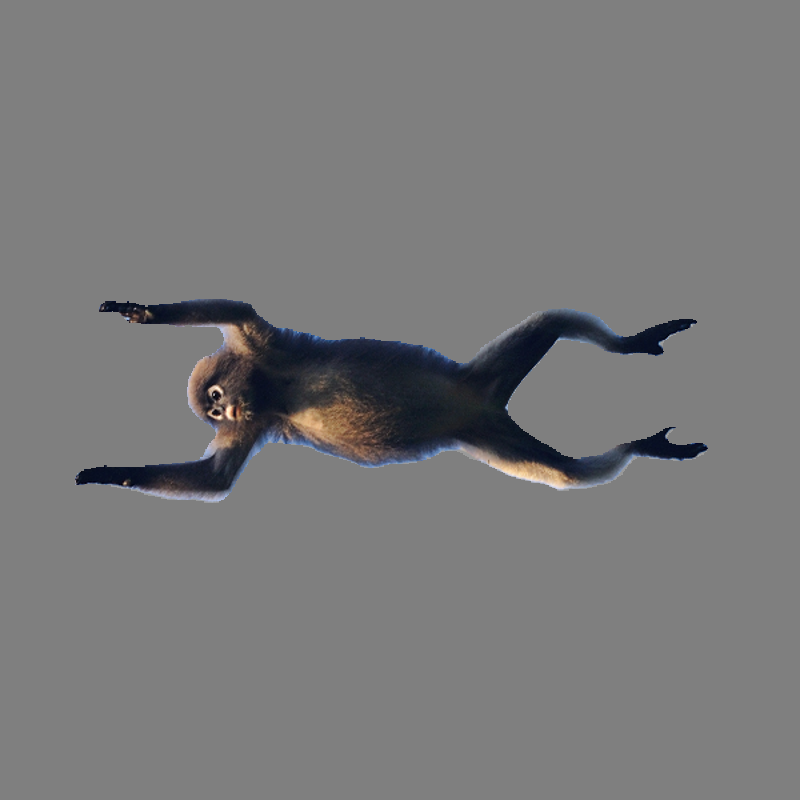

In [9]:
param_f = lambda: text_synth_param_occluder(pic, occluder, device)
for lay in layers:
    set_seed(seed)
    objective = activation_difference([lay], transform_f=gram_matrix)
    vis = render.render_vis(model, objective, param_f, show_inline=True, transforms=all_transforms, thresholds=(32,))

In [10]:
filename = stim_path + "monkey_2_IN_text" + '.png'
temp = vis[0][0]
temp = temp[200:600,:,:]
temp_pic = Image.fromarray(np.uint8((temp)*255))
temp_pic = temp_pic.resize(final_size,Image.BILINEAR)
temp_pic.save(filename)